<a href="https://colab.research.google.com/github/darkun7/Data-Mining-Notebook/blob/main/Modul%206-Hartawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 Praktikum Data Mining
## K Means Clustering
* Hartawan Bahari Mulyadi
* Student ID: 182410101113


In [1]:
#@title Initial Import
# Init Library
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

from google.colab import drive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import sys

sys.path.append('/content/gdrive/MyDrive/Tugas/datmin')
drive.mount('/content/gdrive')

from Darkun7 import pretty_print as ptag
from Darkun7 import stream

auth.authenticate_user() #googlecolab
gauth = GoogleAuth()     #pydrive
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Mounted at /content/gdrive


In [2]:
stream.file(drive, '1ifZ1UE5KWG3d1JV_olpeLpTQKrd9Cnx1', 'income.csv')

GoogleDriveFile({'id': '1ifZ1UE5KWG3d1JV_olpeLpTQKrd9Cnx1', 'kind': 'drive#file', 'etag': '"MTYxODI5NTE2NjU3Mg"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1ifZ1UE5KWG3d1JV_olpeLpTQKrd9Cnx1', 'webContentLink': 'https://drive.google.com/uc?id=1ifZ1UE5KWG3d1JV_olpeLpTQKrd9Cnx1&export=download', 'alternateLink': 'https://drive.google.com/file/d/1ifZ1UE5KWG3d1JV_olpeLpTQKrd9Cnx1/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1ifZ1UE5KWG3d1JV_olpeLpTQKrd9Cnx1/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'income.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-04-13T06:25:46.259Z', 'modifiedDate': '2021-04-13T06:26:06.572Z', 'modifiedByMeDate': '2021-04-13T06:26:06.572Z', 'lastViewedByMeDate': '2021-04-13T06:25:46.259Z', 'markedViewedByMeDate': '1970-01-0

# Kode 1

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

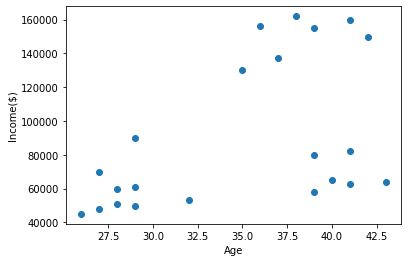

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['cluster']=y_predicted
df.head()
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

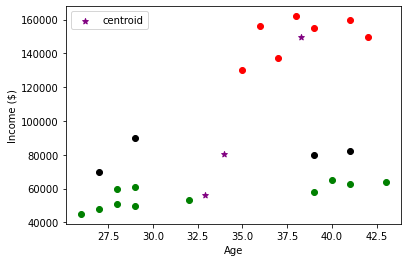

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [10]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


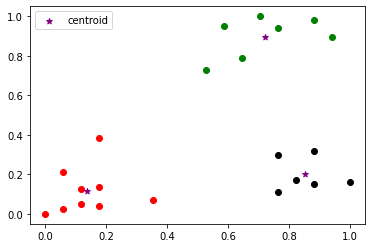

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# TUGAS

tugas
lakukan clustering pada dataset iris. Langkah langkah
1. normalisasikan dataset iris menggunakan normalisasi minmax
2. tampilkan scatter plot sebelum clustering
3. clusterlah dataset iris dengan nilai K 2, 3, 4
4. tampilkan scatter plot setelah clustering
5. analisalah perbandingan scatter plot sebelum clustering dan setelah clustering
6. tentukan manakah k terbaik jika dilakukan analisa secara visual

tugas no 1 – 6 dilakukan terhadap kombinasi attribut 
* **sepal length ~sepal width**
* **sepal length ~petal width**
* **sepal width ~petal width**
* **petal length ~petal width**


In [12]:
stream.file(drive, '1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX', 'iris.csv')
df_iris = pd.read_csv("iris.csv")
df_iris.head()

GoogleDriveFile({'id': '1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX', 'kind': 'drive#file', 'etag': '"MTYxNjI4MDQwOTgxMg"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX', 'webContentLink': 'https://drive.google.com/uc?id=1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX&export=download', 'alternateLink': 'https://drive.google.com/file/d/1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'iris.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-03-20T22:46:49.812Z', 'modifiedDate': '2021-03-20T22:46:49.812Z', 'modifiedByMeDate': '2021-03-20T22:46:49.812Z', 'lastViewedByMeDate': '2021-03-21T00:24:33.127Z', 'markedViewedByMeDate': '1970-01-01T

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### sepal length ~sepal width

In [13]:
# sepal length ~sepal width
df_slsw = df_iris[["sepal.length","sepal.width"]]
df_slsw

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [14]:
def normalizationMinMax(df, features):
  scaler = MinMaxScaler()
  for feature in features:
    scaler.fit(df[[feature]])
    df[feature] = scaler.transform(df[[feature]])
  print(df)
  return df

In [15]:
# 1. normalisasikan dataset iris menggunakan normalisasi minmax
df_slsw = normalizationMinMax(df_iris, ["sepal.length","sepal.width"])

     sepal.length  sepal.width  petal.length  petal.width    variety
0        0.222222     0.625000           1.4          0.2     Setosa
1        0.166667     0.416667           1.4          0.2     Setosa
2        0.111111     0.500000           1.3          0.2     Setosa
3        0.083333     0.458333           1.5          0.2     Setosa
4        0.194444     0.666667           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145      0.666667     0.416667           5.2          2.3  Virginica
146      0.555556     0.208333           5.0          1.9  Virginica
147      0.611111     0.416667           5.2          2.0  Virginica
148      0.527778     0.583333           5.4          2.3  Virginica
149      0.444444     0.416667           5.1          1.8  Virginica

[150 rows x 5 columns]


Text(0, 0.5, 'sepal.width')

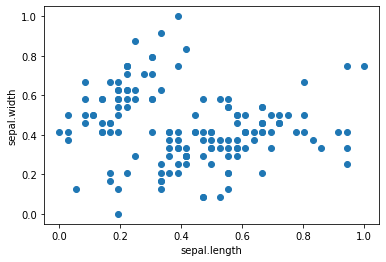

In [16]:
# 2. tampilkan scatter plot sebelum clustering
plt.scatter(df_slsw[['sepal.length']],df_slsw['sepal.width'])
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')

In [17]:
# 3.clusterlah dataset iris dengan nilai K 2, 3, 4
km2 = KMeans(n_clusters=2)
y_predicted2 = km2.fit_predict(df_slsw[['sepal.length','sepal.width']])
y_predicted2

km3 = KMeans(n_clusters=3)
y_predicted3 = km3.fit_predict(df_slsw[['sepal.length','sepal.width']])
y_predicted3

km4 = KMeans(n_clusters=4)
y_predicted4 = km4.fit_predict(df_slsw[['sepal.length','sepal.width']])
y_predicted4

ptag.sep("Clustered")

==============[Clustered]===============


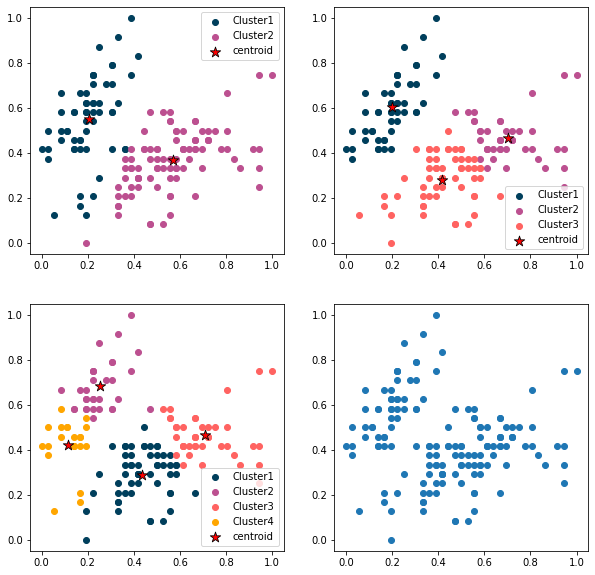

In [18]:
# 4.tampilkan scatter plot setelah clustering
colors = ['#003f5c', '#bc5090', '#ff6361', '#ffa600'] #blue, purple, orange, yellow
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

def showCluster(df,kmeans,y_var, n_cluster, features,pos):
  df['cluster']=y_var #new column named as cluster
  for _ in range(n_cluster):
    show = df[ df.cluster==_ ]
    axs[pos[0],pos[1]].scatter(show[ features[0] ],show[ features[1] ],color=colors[_], label="Cluster"+str(_+1))
  axs[pos[0],pos[1]].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',
              marker='*',s=120, ec="black",lw='.8',label='centroid')
  axs[pos[0],pos[1]].legend()

showCluster(df_slsw,km2, y_predicted2, 2, ['sepal.length', 'sepal.width'],[0,0])
showCluster(df_slsw,km3, y_predicted3, 3, ['sepal.length', 'sepal.width'],[0,1])
showCluster(df_slsw,km4, y_predicted4, 4, ['sepal.length', 'sepal.width'],[1,0])
#unclustered
axs[1,1].scatter(df_slsw[['sepal.length']],df_slsw['sepal.width'])

In [ ]:
# 5.analisalah perbandingan scatter plot sebelum clustering dan setelah clustering
#....> The cluster is distributed, but we its might be better to remove some data that too far from centroid (outliers). In term of clustering,
#      The data around (0,2) x and (0,2) y to (0,0) x, (0,0) y changes, based on centroid position.
# 6.tentukan manakah k terbaik jika dilakukan analisa secara visual
#....> cluster 3 with merge at cluster 2&3 (orange-purp)

### sepal length ~petal width

     sepal.length  sepal.width  petal.length  petal.width    variety  cluster
0        0.222222     0.625000           1.4     0.041667     Setosa        1
1        0.166667     0.416667           1.4     0.041667     Setosa        3
2        0.111111     0.500000           1.3     0.041667     Setosa        3
3        0.083333     0.458333           1.5     0.041667     Setosa        3
4        0.194444     0.666667           1.4     0.041667     Setosa        1
..            ...          ...           ...          ...        ...      ...
145      0.666667     0.416667           5.2     0.916667  Virginica        2
146      0.555556     0.208333           5.0     0.750000  Virginica        0
147      0.611111     0.416667           5.2     0.791667  Virginica        2
148      0.527778     0.583333           5.4     0.916667  Virginica        2
149      0.444444     0.416667           5.1     0.708333  Virginica        0

[150 rows x 6 columns]


Text(0, 0.5, 'petal.width')

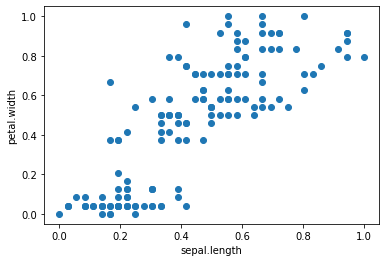

In [20]:
# 1. normalisasikan dataset iris menggunakan normalisasi minmax
df_slpw = normalizationMinMax(df_iris, ["sepal.length","petal.width"])

# 2. tampilkan scatter plot sebelum clustering
plt.scatter(df_slsw[['sepal.length']],df_slsw['petal.width'])
plt.xlabel('sepal.length')
plt.ylabel('petal.width')

In [21]:
# 3.clusterlah dataset iris dengan nilai K 2, 3, 4
km2 = KMeans(n_clusters=2)
y_predicted2 = km2.fit_predict(df_slpw[['sepal.length','petal.width']])
y_predicted2

km3 = KMeans(n_clusters=3)
y_predicted3 = km3.fit_predict(df_slpw[['sepal.length','petal.width']])
y_predicted3

km4 = KMeans(n_clusters=4)
y_predicted4 = km4.fit_predict(df_slpw[['sepal.length','petal.width']])
y_predicted4

ptag.sep("Clustered")

==============[Clustered]===============


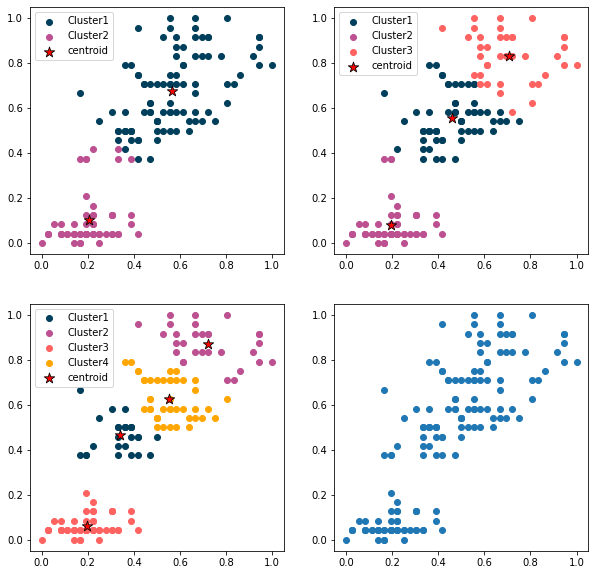

In [22]:
# 4.tampilkan scatter plot setelah clustering
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
showCluster(df_slpw,km2, y_predicted2, 2, ['sepal.length', 'petal.width'],[0,0])
showCluster(df_slpw,km3, y_predicted3, 3, ['sepal.length', 'petal.width'],[0,1])
showCluster(df_slpw,km4, y_predicted4, 4, ['sepal.length', 'petal.width'],[1,0])
#unclustered
axs[1,1].scatter(df_slpw[['sepal.length']],df_slpw['petal.width'])

In [ ]:
# 5.analisalah perbandingan scatter plot sebelum clustering dan setelah clustering
#....> compared to the unclustered with clustered, the data can be grouped into 2 cluster, put also can be group into 4, 
#      its based on the perspective
# 6.tentukan manakah k terbaik jika dilakukan analisa secara visual
#....> cluster 4 is better that others, we can see at the cluster was clustered neatly, its separate based on value. 
#      in another perspective we could group it into 2 cluster by merge cluster 1,5,and 2

### sepal width ~petal width

     sepal.length  sepal.width  petal.length  petal.width    variety  cluster
0        0.222222     0.625000           1.4     0.041667     Setosa        2
1        0.166667     0.416667           1.4     0.041667     Setosa        2
2        0.111111     0.500000           1.3     0.041667     Setosa        2
3        0.083333     0.458333           1.5     0.041667     Setosa        2
4        0.194444     0.666667           1.4     0.041667     Setosa        2
..            ...          ...           ...          ...        ...      ...
145      0.666667     0.416667           5.2     0.916667  Virginica        1
146      0.555556     0.208333           5.0     0.750000  Virginica        3
147      0.611111     0.416667           5.2     0.791667  Virginica        1
148      0.527778     0.583333           5.4     0.916667  Virginica        1
149      0.444444     0.416667           5.1     0.708333  Virginica        3

[150 rows x 6 columns]


Text(0, 0.5, 'petal.width')

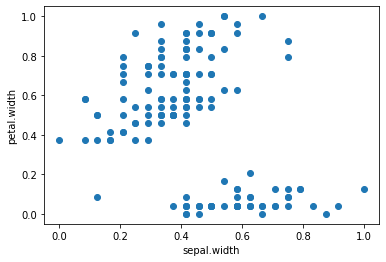

In [24]:
# 1. normalisasikan dataset iris menggunakan normalisasi minmax
df_swpw = normalizationMinMax(df_iris, ["sepal.width","petal.width"])

# 2. tampilkan scatter plot sebelum clustering
plt.scatter(df_swpw[['sepal.width']],df_swpw['petal.width'])
plt.xlabel('sepal.width')
plt.ylabel('petal.width')

In [25]:
# 3.clusterlah dataset iris dengan nilai K 2, 3, 4
km2 = KMeans(n_clusters=2)
y_predicted2 = km2.fit_predict(df_swpw[['sepal.width','petal.width']])
y_predicted2

km3 = KMeans(n_clusters=3)
y_predicted3 = km3.fit_predict(df_swpw[['sepal.width','petal.width']])
y_predicted3

km4 = KMeans(n_clusters=4)
y_predicted4 = km4.fit_predict(df_swpw[['sepal.width','petal.width']])
y_predicted4

ptag.sep("Clustered")

==============[Clustered]===============


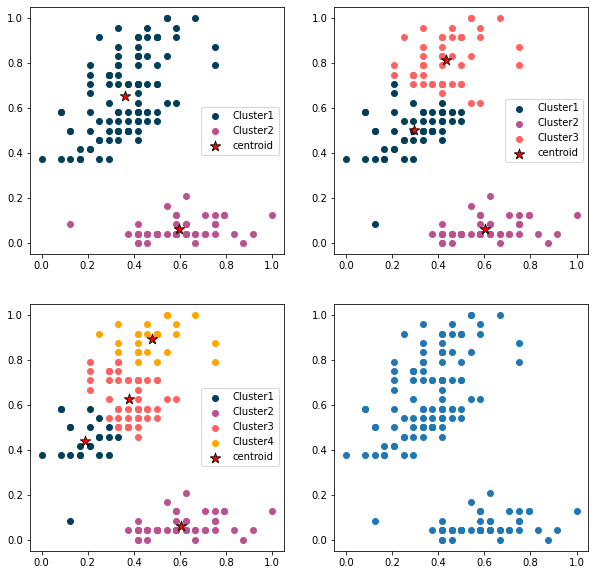

In [26]:
# 4.tampilkan scatter plot setelah clustering
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
showCluster(df_swpw,km2, y_predicted2, 2, ['sepal.width', 'petal.width'],[0,0])
showCluster(df_swpw,km3, y_predicted3, 3, ['sepal.width', 'petal.width'],[0,1])
showCluster(df_swpw,km4, y_predicted4, 4, ['sepal.width', 'petal.width'],[1,0])
#unclustered
axs[1,1].scatter(df_swpw[['sepal.width']],df_swpw['petal.width'])

In [ ]:
# 5.analisalah perbandingan scatter plot sebelum clustering dan setelah clustering
#....> by identify each cluster, we can see the plot can be group into 2 cluster.
# 6.tentukan manakah k terbaik jika dilakukan analisa secara visual
#....> cluster 2 is enough to group the data

### petal length ~petal width

     sepal.length  sepal.width  petal.length  petal.width    variety  cluster
0        0.222222     0.625000      0.067797     0.041667     Setosa        1
1        0.166667     0.416667      0.067797     0.041667     Setosa        1
2        0.111111     0.500000      0.050847     0.041667     Setosa        1
3        0.083333     0.458333      0.084746     0.041667     Setosa        1
4        0.194444     0.666667      0.067797     0.041667     Setosa        1
..            ...          ...           ...          ...        ...      ...
145      0.666667     0.416667      0.711864     0.916667  Virginica        3
146      0.555556     0.208333      0.677966     0.750000  Virginica        2
147      0.611111     0.416667      0.711864     0.791667  Virginica        3
148      0.527778     0.583333      0.745763     0.916667  Virginica        3
149      0.444444     0.416667      0.694915     0.708333  Virginica        2

[150 rows x 6 columns]


Text(0, 0.5, 'petal.width')

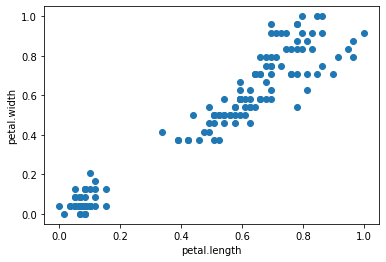

In [27]:
# 1. normalisasikan dataset iris menggunakan normalisasi minmax
df_plpw = normalizationMinMax(df_iris, ["petal.length","petal.width"])

# 2. tampilkan scatter plot sebelum clustering
plt.scatter(df_plpw[['petal.length']],df_plpw['petal.width'])
plt.xlabel('petal.length')
plt.ylabel('petal.width')

In [28]:
# 3.clusterlah dataset iris dengan nilai K 2, 3, 4
km2 = KMeans(n_clusters=2)
y_predicted2 = km2.fit_predict(df_plpw[['petal.length','petal.width']])
y_predicted2

km3 = KMeans(n_clusters=3)
y_predicted3 = km3.fit_predict(df_plpw[['petal.length','petal.width']])
y_predicted3

km4 = KMeans(n_clusters=4)
y_predicted4 = km4.fit_predict(df_plpw[['petal.length','petal.width']])
y_predicted4

ptag.sep("Clustered")

==============[Clustered]===============


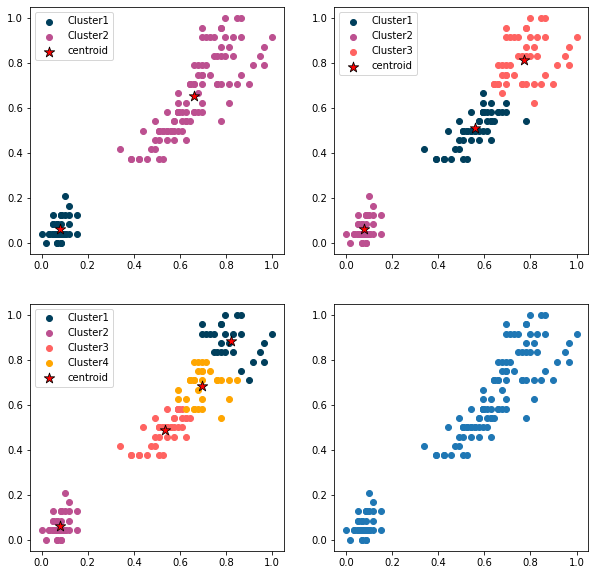

In [29]:
# 4.tampilkan scatter plot setelah clustering
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
showCluster(df_plpw,km2, y_predicted2, 2, ['petal.length', 'petal.width'],[0,0])
showCluster(df_plpw,km3, y_predicted3, 3, ['petal.length', 'petal.width'],[0,1])
showCluster(df_plpw,km4, y_predicted4, 4, ['petal.length', 'petal.width'],[1,0])
#unclustered
axs[1,1].scatter(df_plpw[['petal.length']],df_plpw['petal.width'])

In [ ]:
# 5.analisalah perbandingan scatter plot sebelum clustering dan setelah clustering
#....> we can spot the data is better if clustered into 2 group. compared to unclustered, we can see clearly the group in between
# 6.tentukan manakah k terbaik jika dilakukan analisa secara visual
#....> cluster 2 is more than enough to cluster the data